* 나중에 살펴보기
### plotly
```
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.figure_factory as fig_fact
```

In [543]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

In [544]:
train = pd.read_csv('./_data/train.csv', index_col=0)#id를 인덱스로
test = pd.read_csv('./_data/test.csv', index_col=0)

In [545]:
from pycaret.classification import * 

* null이 포함되어있는 feature를 nan으로

In [546]:
# thal = 0 = Null 
train[train['thal']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
id,,,,,,,,,,,,,,
130,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1


In [547]:
test[test['thal']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
id,,,,,,,,,,,,,
47,52,1,0,128,204,1,1,156,1,1.0,1,0,0


In [548]:
train.loc[train['thal']==0,'thal'] = np.nan
test.loc[test['thal']==0,'thal'] = np.nan

In [549]:
# ca = 4 = Null
train[train['ca']==4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
id,,,,,,,,,,,,,,


In [550]:
test[test['ca']==4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
id,,,,,,,,,,,,,
41,52,1,2,138,223,0,1,169,0,0.0,2,4,2.0
46,43,1,0,132,247,1,0,143,1,0.1,1,4,3.0
80,58,1,1,125,220,0,1,144,0,0.4,1,4,3.0
81,38,1,2,138,175,0,1,173,0,0.0,2,4,2.0
96,38,1,2,138,175,0,1,173,0,0.0,2,4,2.0


In [551]:
test.loc[test['ca']==4,'ca'] = np.nan

In [552]:
print(train['thal'].isna().sum())
print(test['thal'].isna().sum())

1
1


In [553]:
print(train['ca'].isna().sum())
print(test['ca'].isna().sum())

0
5


# pycaret
* https://john-analyst.medium.com/pycaret-%EC%BD%94%EB%93%9C-%EB%AA%87-%EC%A4%84%EB%A1%9C-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EB%AA%A8%EB%8D%B8-%EB%A7%8C%EB%93%A4%EA%B8%B0-18a8de4b6024
* https://pycaret.org/setup/

### 데이터 전처리
* preprocess: bool, default = True
    * 전처리가 모두 되어있는 데이터일 경우 False

* 비어있는/잘못된 데이터 처리
    * imputation_type: str, default = ‘simple’
        * The type of imputation to use. Can be either ‘simple’ or ‘iterative’.
    * iterative_imputation_iters : int, default = 5
    * categorical_imputation: str, default = ‘constant’
        * **Missing values in categorical features are imputed with a constant ‘not_available’ value. The other available option is ‘mode’.**
    * categorical_iterative_imputer: str, default = ‘lightgbm’
    
    * ordinal_features: dict, default = None
        * Encode categorical features as ordinal. For example, a categorical feature with ‘low’, ‘medium’, ‘high’ values where low < medium < high can be passed as ordinal_features = { ‘column_name’ : `['low','medium','high']` }.

    * high_cardinality_features: list of str, default = None
        * 너무 많은 범주를 가졌을 경우 압축
    * high_cardinality_method: str, default = ‘frequency’

    * numeric_imputation: str, default = ‘mean’
        * **Missing values in numeric features are imputed with ‘mean’ value of the feature in the training dataset. The other available option is ‘median’ or ‘zero’.**
    * numeric_iterative_imputer: str, default = ‘lightgbm’
    * date_features: list of str, default = None
    * handle_unknown_categorical: bool, default = True 
        * When set to True, unknown categorical levels in unseen data are replaced by the most or least frequent level as learned in the training dataset.
    * unknown_categorical_method: str, default = ‘least_frequent’
        * Method used to replace unknown categorical levels in unseen data. Method can be set to ‘least_frequent’ or ‘most_frequent.
* 이상치 처리
    * remove_outliers: bool, default = False
        * When set to True, outliers from the training data are removed using the Singular Value Decomposition.
    * outliers_threshold: float, default = 0.05
        * The percentage outliers to be removed from the training dataset. Ignored when remove_outliers is not True.
    * remove_multicollinearity 
        * features with the inter-correlations higher than the defined threshold are removed.

### 특징 선택 및 추가
* feature_selection: bool, default = False
* feature_selection_threshold: float, default = 0.8
* feature_selection_method: str, default = ‘classic’

* feature_interaction: bool, default = False
    * new features are created by interacting (a * b) 
* interaction_threshold: bool, default = 0.01

* feature_ratio: bool, default = False
    * new features are created by calculating the ratios (a / b)

### 불균형한 데이터셋
* fix_imbalance: bool, default = False
* fix_imbalance_method: obj, default = None
    * When fix_imbalance is True, ‘imblearn’ compatible object with ‘fit_resample’ method can be passed. When set to None, ‘imblearn.over_sampling.SMOTE’ is used.

### 데이터 분할 (훈련/테스트/검증)
* data_split_shuffle: bool, default = True
* data_split_stratify: bool or list, default = False
* fold_strategy: str or sklearn CV generator object, default = ‘stratifiedkfold’
    * Choice of cross validation strategy. Possible values are:
        * kfold
        * stratifiedkfold
        * groupkfold
        * timeseries
* fold: int, default = 10
* fold_shuffle: bool, default = False
* fold_groups: str or array-like, with shape (n_samples,), default = None
* 그 외 기능이 엄청 많다 -0- gpu설정, 로그파일, 등등

# 모델 만들기

#### 사용할 데이터
* categorical_features : sex, cp, (exang), slope, ca, thal, restecg
* numeric_features : age, (trestbps), (thalach), (fbs), (oldpeak), (chol)

In [564]:
SEED = 32

In [560]:
# ignore_features = []
# categorical_features = ['sex', 'cp', 'slope', 'ca','exang', 'restecg', 'thal']
# numeric_features = ['age', 'trestbps', 'thalach', 'fbs','oldpeak', 'chol']

In [565]:
ignore_features = ['fbs','oldpeak', 'chol', 'restecg','trestbps', 'thalach','exang']
categorical_features = ['sex', 'cp', 'slope', 'ca', 'thal']
numeric_features = ['age']

In [566]:
clf = setup(data=train, 
            target='target', 
            ignore_features=ignore_features,           
            categorical_features=categorical_features, 
            numeric_features=numeric_features,
            remove_outliers=True,
            outliers_threshold=0.1,
            normalize=True,                            
            #handle_unknown_categorical=True,
            imputation_type='iterative',              
            iterative_imputation_iters=10,            
            categorical_iterative_imputer='lightgbm',
            #polynomial_features=True,
            session_id=SEED, 
            silent=True
            #profile=True
            ) 

,Description,Value
0,session_id,32
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(151, 14)"
5,Missing Values,True
6,Numeric Features,1
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [567]:
best_models = compare_models(sort='f1', n_select=3, fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8415,0.0000,0.8855,0.8433,0.8617,0.6749,0.6811,0.0060
lda,Linear Discriminant Analysis,0.8415,0.9101,0.8855,0.8433,0.8617,0.6749,0.6811,0.0080
knn,K Neighbors Classifier,0.8415,0.9143,0.8455,0.8705,0.8513,0.6786,0.6916,0.0540
lightgbm,Light Gradient Boosting Machine,0.8310,0.9034,0.8655,0.8438,0.8504,0.6556,0.6660,0.0180
xgboost,Extreme Gradient Boosting,0.8310,0.9304,0.8473,0.8549,0.8467,0.6576,0.6679,0.0520
lr,Logistic Regression,0.8193,0.9296,0.8836,0.8064,0.8412,0.6287,0.6375,0.0100
rf,Random Forest Classifier,0.8199,0.9456,0.8455,0.8455,0.8377,0.6325,0.6480,0.2080
catboost,CatBoost Classifier,0.8205,0.9116,0.8291,0.8511,0.8320,0.6398,0.6549,0.3580
et,Extra Trees Classifier,0.8199,0.9062,0.7891,0.8917,0.8264,0.6404,0.6616,0.1880
gbc,Gradient Boosting Classifier,0.7994,0.8933,0.8109,0.8286,0.8144,0.5968,0.6077,0.0220


In [568]:
tuned_top3 = [tune_model(i) for i in best_models]
blender = blend_models(tuned_top3)
stacker = stack_models(tuned_top3)
best_auc_model = automl(optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9000,1.0000,1.0000,0.8333,0.9091,0.8000,0.8165
1,0.9000,1.0000,1.0000,0.8333,0.9091,0.8000,0.8165
2,0.6000,0.7500,0.5000,0.7500,0.6000,0.2308,0.2500
3,0.9000,1.0000,0.8333,1.0000,0.9091,0.8000,0.8165
4,0.8889,0.9500,0.8000,1.0000,0.8889,0.7805,0.8000
5,0.8889,1.0000,1.0000,0.8333,0.9091,0.7692,0.7906
6,0.6667,0.9000,0.8000,0.6667,0.7273,0.3077,0.3162
7,0.8889,0.9000,1.0000,0.8333,0.9091,0.7692,0.7906
8,0.8889,0.9500,0.8000,1.0000,0.8889,0.7805,0.8000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [418]:
dt = create_model('dt')
bagged_model = ensemble_model(dt, method = 'Bagging', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9000,0.9747,0.9091,0.9091,0.9091,0.7980,0.7980
1,0.9500,0.9747,1.0000,0.9167,0.9565,0.8980,0.9027
2,0.9500,0.9896,0.9167,1.0000,0.9565,0.8980,0.9027
3,0.9000,1.0000,0.8333,1.0000,0.9091,0.8000,0.8165
4,0.7895,0.9034,0.6364,1.0000,0.7778,0.5957,0.6513
Mean,0.8979,0.9685,0.8591,0.9652,0.9018,0.7979,0.8142
SD,0.0586,0.0339,0.1232,0.0427,0.0655,0.1104,0.0921


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9000,1.0000,1.0000,0.8571,0.9231,0.7826,0.8018
3,0.9000,1.0000,0.8333,1.0000,0.9091,0.8000,0.8165
4,0.9000,0.8750,0.8333,1.0000,0.9091,0.8000,0.8165
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9000,1.0000,0.8333,1.0000,0.9091,0.8000,0.8165
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.6000,0.6667,0.5000,0.7500,0.6000,0.2308,0.2500
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


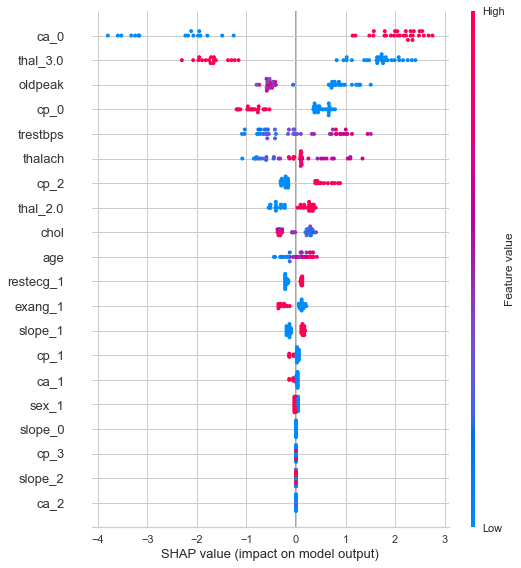

In [432]:
xgboost = create_model('xgboost')
interpret_model(xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9000,1.0000,0.8000,1.0000,0.8889,0.8000,0.8165
1,0.9000,1.0000,1.0000,0.8333,0.9091,0.8000,0.8165
2,0.9000,1.0000,1.0000,0.8571,0.9231,0.7826,0.8018
3,0.9000,0.9167,0.8333,1.0000,0.9091,0.8000,0.8165
4,0.9000,0.8750,0.8333,1.0000,0.9091,0.8000,0.8165
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.8000,0.9167,0.8333,0.8333,0.8333,0.5833,0.5833
7,0.9000,1.0000,0.8333,1.0000,0.9091,0.8000,0.8165
8,0.5000,0.6667,0.5000,0.6000,0.5455,0.0000,0.0000
9,0.8889,1.0000,0.8000,1.0000,0.8889,0.7805,0.8000


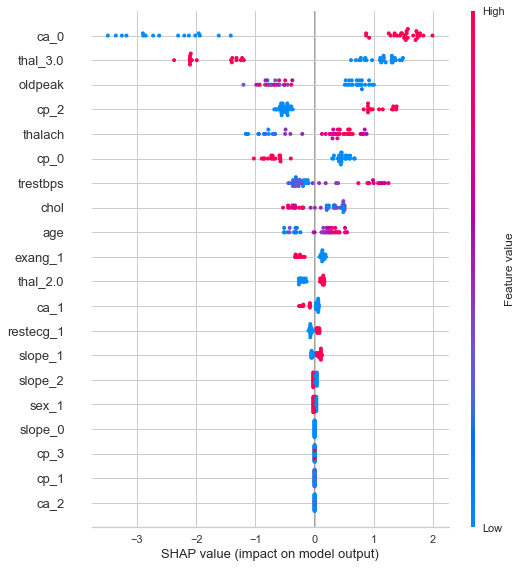

In [433]:
lbgm = create_model('lightgbm')
interpret_model(lbgm)

In [574]:
finalized_model = finalize_model(best_auc_model)

In [ ]:
best_auc_model

In [575]:
predictions = predict_model(data=test, estimator=finalized_model)

In [576]:
predictions

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Label,Score
id,,,,,,,,,,,,,,,
1,57,1,0,150,276,0,0,112,1,0.6,1,1.0,1.0,0,0.6667
2,59,1,3,170,288,0,0,159,0,0.2,1,0.0,3.0,1,0.6667
3,57,1,2,150,126,1,1,173,0,0.2,2,1.0,3.0,1,1.0000
4,56,0,0,134,409,0,0,150,1,1.9,1,2.0,3.0,0,1.0000
5,71,0,2,110,265,1,0,130,0,0.0,2,1.0,2.0,1,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,64,0,0,130,303,0,1,122,0,2.0,1,2.0,2.0,0,1.0000
149,43,0,0,132,341,1,0,136,1,3.0,1,0.0,3.0,0,0.6667
150,53,1,0,123,282,0,1,95,1,2.0,1,2.0,3.0,0,1.0000


In [577]:
predictions[predictions['Label']==1].count()

age         71
sex         71
cp          71
trestbps    71
chol        71
fbs         71
restecg     71
thalach     71
exang       71
oldpeak     71
slope       71
ca          68
thal        71
Label       71
Score       71
dtype: int64

In [594]:
submission = pd.read_csv('./_data/sample_submission.csv', index_col=0)
submission

,target
id,
1,0
2,0
3,0
4,0
5,0
...,...
148,0
149,0
150,0


In [579]:
ignore_features = ['fbs','oldpeak', 'chol', 'restecg','trestbps', 'thalach']
categorical_features = ['sex', 'cp', 'slope', 'ca', 'thal','exang']
numeric_features = ['age']

In [589]:
clf = setup(data=train, 
            target='target', 
            ignore_features=ignore_features,           
            categorical_features=categorical_features, 
            numeric_features=numeric_features,
            remove_outliers=True,
            #outliers_threshold=0.1,
            normalize=True,        
            normalize_method='zscore',    #minmax, zscore, maxabs, robust
            feature_selection=True,
            #feature_selection_threshold=0.9,
            imputation_type='iterative',
            categorical_imputation='mode',
            iterative_imputation_iters=10,            
            categorical_iterative_imputer='xgboost',
            trigonometry_features=True,
            session_id=SEED, 
            silent=True
            #profile=True
            ) 

,Description,Value
0,session_id,32
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(151, 14)"
5,Missing Values,True
6,Numeric Features,1
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [590]:
best_models = compare_models(sort='f1', n_select=3, fold=5)
tuned_top3 = [tune_model(i) for i in best_models]
blender = blend_models(tuned_top3)
stacker = stack_models(tuned_top3)
best_auc_model = automl(optimize = 'F1')
finalized_model = finalize_model(best_auc_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8000,1.0000,1.0000,0.7143,0.8333,0.6000,0.6547
1,0.9000,1.0000,1.0000,0.8333,0.9091,0.8000,0.8165
2,0.6000,0.8000,0.4000,0.6667,0.5000,0.2000,0.2182
3,0.9000,1.0000,0.8000,1.0000,0.8889,0.8000,0.8165
4,0.9000,1.0000,0.8000,1.0000,0.8889,0.8000,0.8165
5,0.9000,1.0000,0.8333,1.0000,0.9091,0.8000,0.8165
6,0.6000,0.8750,0.8333,0.6250,0.7143,0.0909,0.1021
7,0.9000,1.0000,0.8333,1.0000,0.9091,0.8000,0.8165
8,0.8000,0.9167,0.8333,0.8333,0.8333,0.5833,0.5833
9,0.8889,1.0000,1.0000,0.8333,0.9091,0.7692,0.7906


In [591]:
predictions = predict_model(data=test, estimator=finalized_model)
predictions[predictions['Label']==1].count()

age         78
sex         78
cp          78
trestbps    78
chol        78
fbs         78
restecg     78
thalach     78
exang       78
oldpeak     78
slope       78
ca          74
thal        78
Label       78
Score       78
dtype: int64

In [ ]:
submission['target'] = predictions['Label']
submission

In [ ]:
submission.to_csv('./submission9.csv')

## SCORE 0.8275862069
* ....0.1올리기 너무 힘들다ㅠㅠ